In [2]:
import numpy as np
import pandas as pd
import sklearn

In [3]:
df = pd.read_csv('ml_python_2019/data/housing_data',delim_whitespace = True, header = None)

In [4]:
#df.head()

In [5]:
col_name = ['CRIM', 'ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df.columns = col_name

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [9]:
df.describe()
#gives good data to begin statistical analysis
#when std. deviation is much larger than the mean it tells you the data is very noisey
#small std. deviation lets you have more confidence in analysis
#similar means and std. deviations across features tends to be good

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

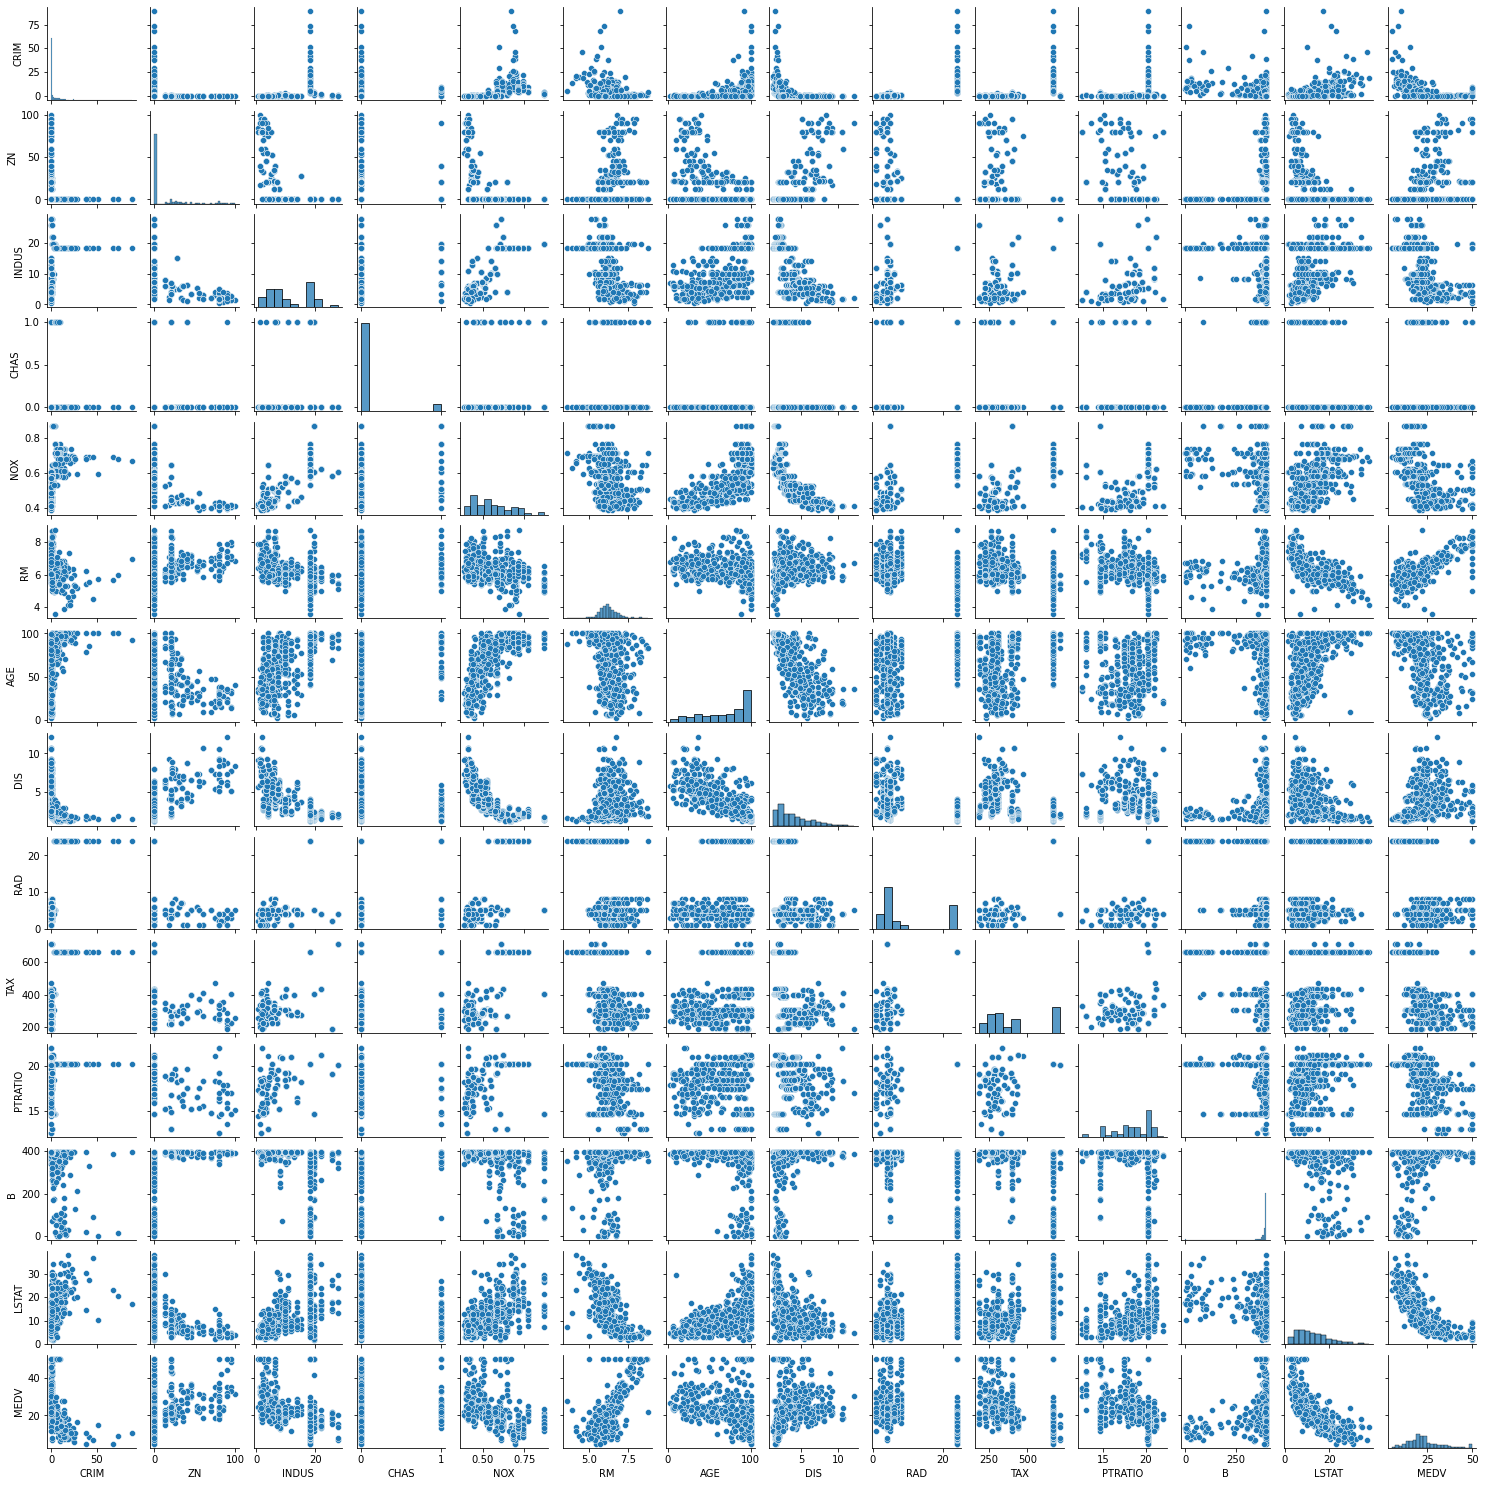

In [11]:
sns.pairplot(df, height = 1.5)



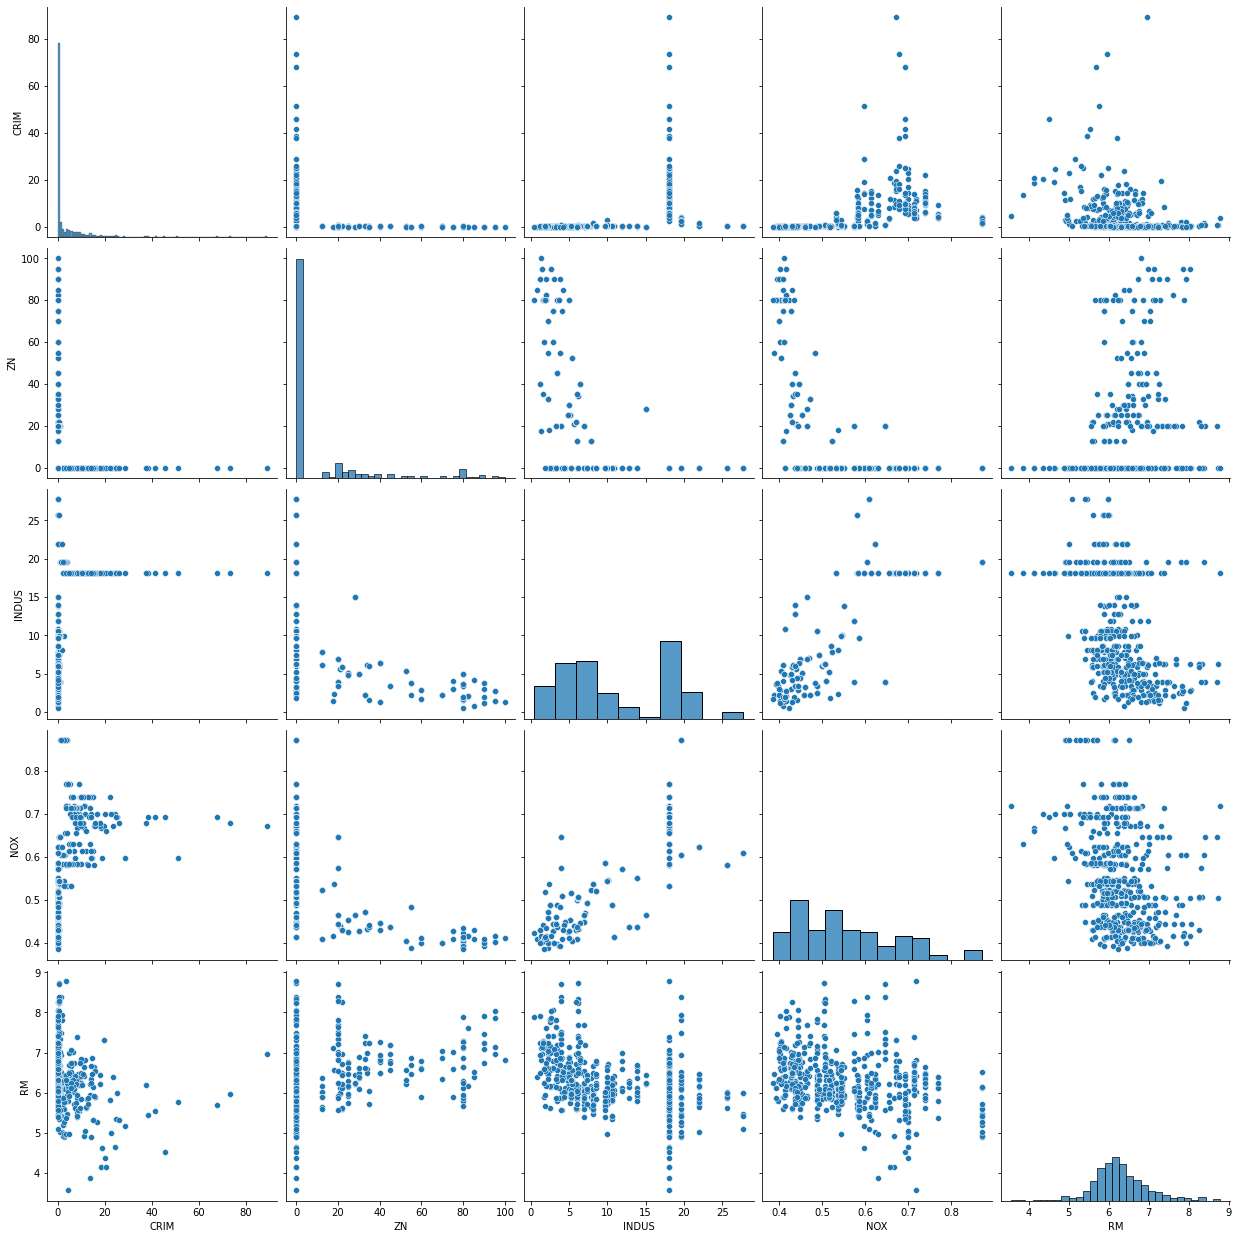

In [15]:
col_study = ['CRIM','ZN','INDUS','NOX','RM']
sns.pairplot(df[col_study], height = 3.5)

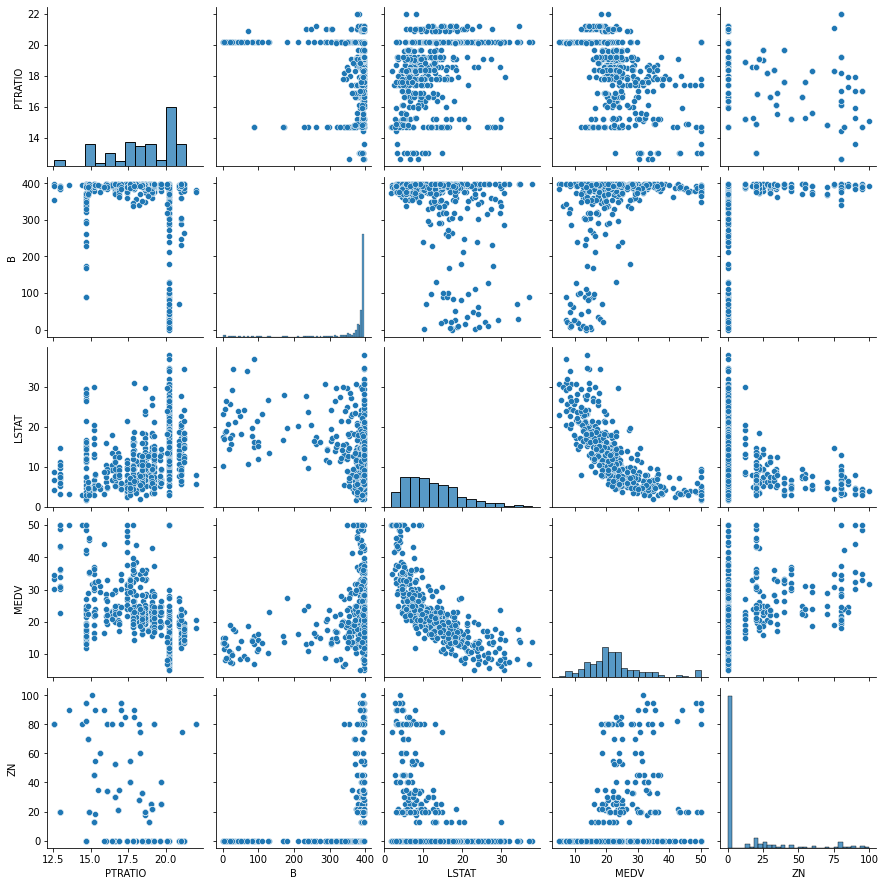

In [31]:
col_study2 = ['PTRATIO', 'B','LSTAT','MEDV','ZN']
sns.pairplot(df[col_study2], height = 2.5)
#graphs along diagonal is a plot against itself
#select graph of features plotted against others that look like they might exhibit a pattern for prediction
#feature selection allaows you to run an ML algorithm that will make sense

Correlation Analysis + Feature Selection

In [21]:
df.corr()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

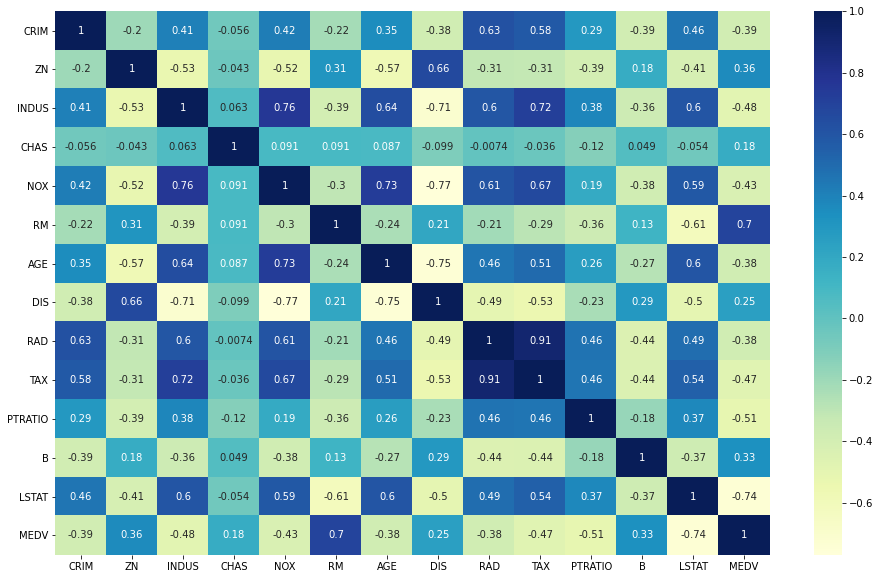

In [26]:
plt.figure(figsize = (16,10))
sns.heatmap(df.corr(),annot = True,cmap="YlGnBu")


<AxesSubplot:>

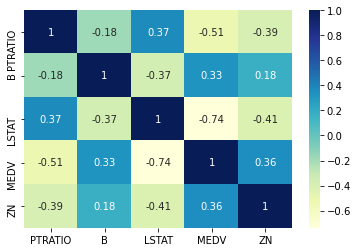

In [34]:
sns.heatmap(df[col_study2].corr(),annot = True ,cmap="YlGnBu")
#annot places the values on the chart as well

In [35]:
pd.options.display.float_format = '{:,.2f}'.format

In [37]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


Linear Regression with SciKit Learn

In [38]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222.00,18.70,396.90,5.33,36.20


In [39]:
x=df['RM'].values.reshape(-1,1)
y=df['MEDV'].values


# x- features
# y-target value

In [41]:
from sklearn.linear_model import LinearRegression


In [42]:
model = LinearRegression()


In [43]:
model.fit(x,y)


LinearRegression()

In [45]:
print(model.coef_) 
print(model.intercept_)


array([9.10210898])

-34.670620776438554

Text(0, 0.5, 'average cost per dwelling')

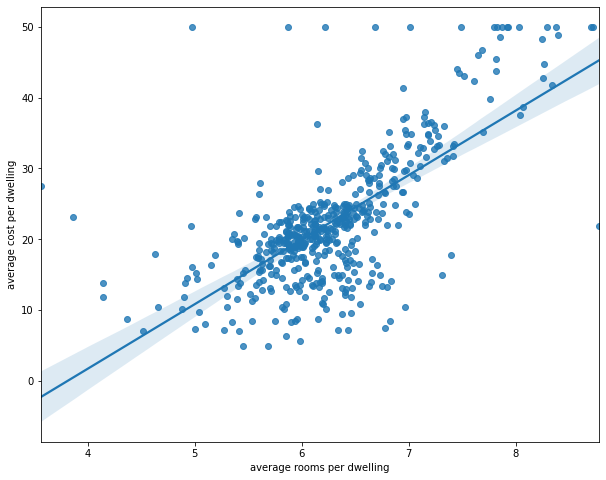

In [50]:
plt.figure(figsize = (10,8))
sns.regplot(x=x,y=y)
plt.xlabel('average rooms per dwelling')
plt.ylabel('average cost per dwelling')

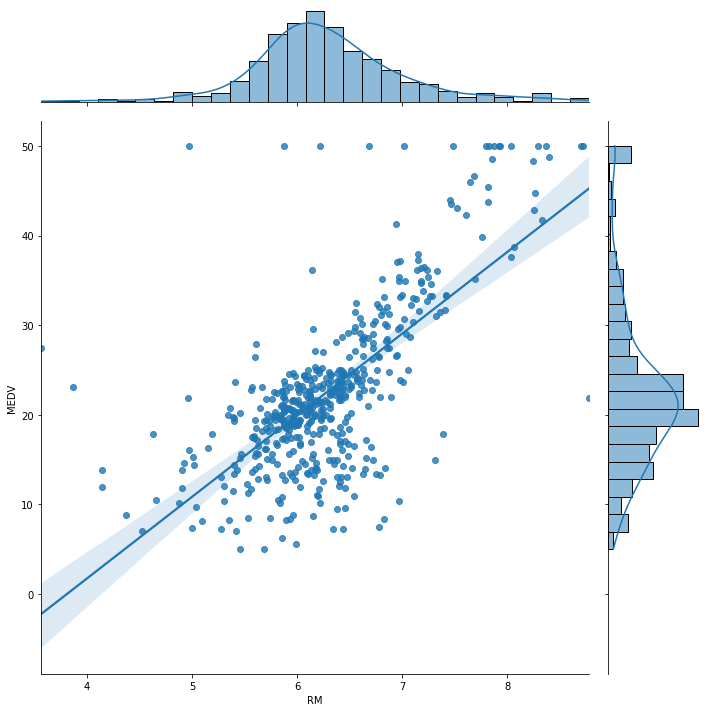

In [52]:
sns.jointplot(x='RM', y='MEDV', data=df, kind = 'reg', height = 10)


In [55]:
model.predict(np.array(5).reshape(-1,1))
#prediction for a five room house


array([10.83992413])

how machine learning works 

 1. choose a class of a model by importing the correct estimator class 
 2. choose model hyperparameters by instantiating the class with desired values
 3. arrange data into features matrix and traget vectors
 4. fit the data by 
 5. apply the model to new data
     predict method is used for supervised learning

array([120.0652319])

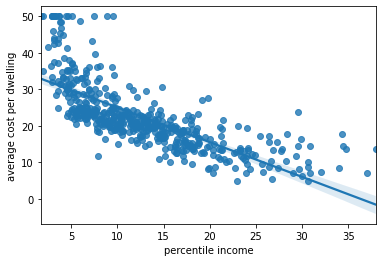

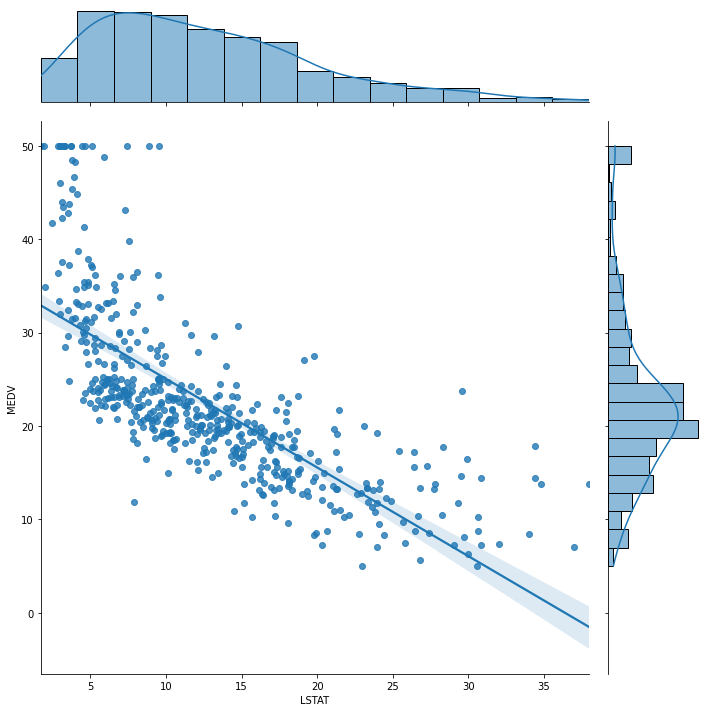

In [57]:
ml2 = LinearRegression()

x = df['LSTAT'].values.reshape(-1,1)
y = df['MEDV'].values

ml2.fit(x,y)

sns.regplot(x=x,y=y)
plt.xlabel('percentile income')
plt.ylabel('average cost per dwelling')

sns.jointplot(x='LSTAT', y='MEDV', data=df, kind = 'reg', height = 10)

model.predict(np.array(17).reshape(-1,1))

Robust regression
    code often violates the conditions of linear regression
    uses RANSAC algorithim

In [58]:
x = df['RM'].values.reshape(-1,1)
y = df['MEDV'].values

In [59]:
from sklearn.linear_model import RANSACRegressor

In [64]:
ransac = RANSACRegressor()

In [65]:
ransac.fit(x,y)

RANSACRegressor()

In [66]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)


In [68]:
np.arange(3, 10, 1)


array([3, 4, 5, 6, 7, 8, 9])

In [71]:
line_x = np.arange(3,10,1)
line_y = ransac.predict(line_x.reshape(-1,1))


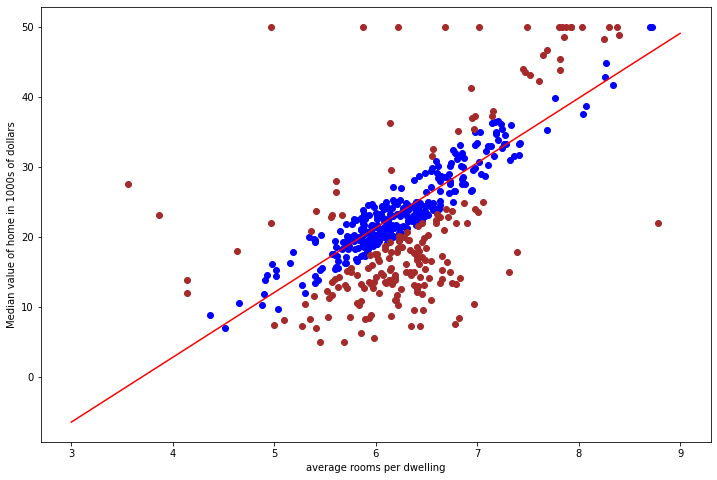

In [81]:
plt.figure(figsize = (12,8))
plt.scatter(x[inlier_mask],y[inlier_mask],c = 'blue', marker = 'o', label = 'Inliers')
plt.scatter(x[outlier_mask],y[outlier_mask], c = 'brown', marker = 'o', label = 'Outliers')   
plt.xlabel('average rooms per dwelling')
plt.ylabel('Median value of home in 1000s of dollars')
plt.plot(line_x, line_y, color = 'red')

In [83]:
x = df['LSTAT'].values.reshape(-1,1)
y = df['MEDV'].values

ransac2 = RANSACRegressor()

ransac2.fit(x,y)

RANSACRegressor()

In [103]:
inlier_arr = ransac2.inlier_mask_
outlier_arr = np.logical_not(inlier_arr)

x_axis = np.arange(0,35,1)
y_axis = ransac2.predict(x_axis.reshape(-1,1))



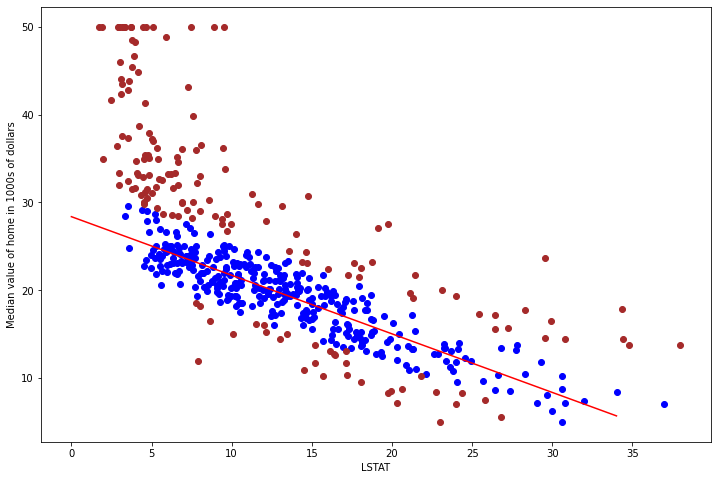

In [104]:
plt.figure(figsize = (12,8))
plt.scatter(x[inlier_arr],y[inlier_arr],c = 'blue', marker = 'o', label = 'Inliers')
plt.scatter(x[outlier_arr],y[outlier_arr], c = 'brown', marker = 'o', label = 'Outliers')   
plt.xlabel('LSTAT')
plt.ylabel('Median value of home in 1000s of dollars')
plt.plot(x_axis, y_axis, color = 'red')

Evaluating the performance of a regression model


In [105]:
from sklearn.model_selection import train_test_split



In [106]:
x = df.iloc[: , :-1].values


In [107]:
y = df['MEDV'].values

In [108]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .2, random_state = 0)
#settting random_state to zero ensures that data will have same starting points
#allows for the comparison of data across different training models

In [111]:
lr = LinearRegression()
lr.fit(x_train,y_train)
LinearRegression(fit_intercept = True, n_jobs = None, normalize = False)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

1. Residual Analysis
first look at the residuals to see if there is an underlying pattern to the data

a good residual analysis will show randomly distributed points with no significant patterns

(-10.0, 50.0)

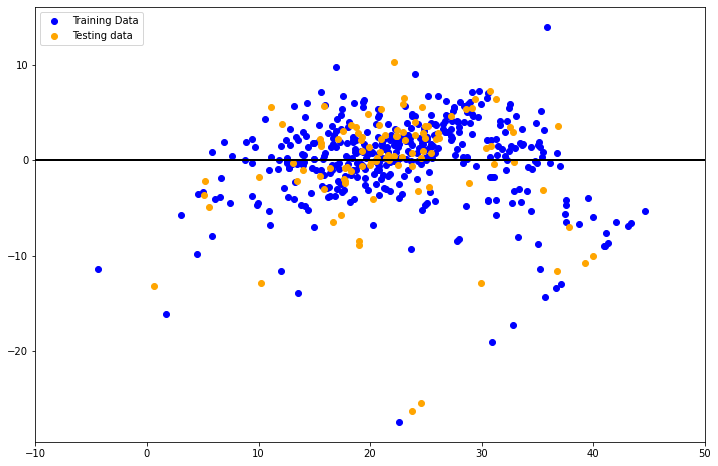

In [115]:
plt.figure(figsize = (12,8))
plt.scatter(y_train_pred, y_train_pred-y_train, c='blue', marker = 'o', label = 'Training Data')
plt.scatter(y_test_pred, y_test_pred-y_test, c = 'orange', marker = 'o', label = 'Testing data')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = -10, xmax = 50, lw = 2, color = 'k')
plt.xlim([-10,50])


Mean Squared Errors

In [118]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_train, y_train_pred)



19.32647020358573

In [117]:
mean_squared_error(y_test, y_test_pred)

33.44897999767643

Coefficient of determination

In [119]:
from sklearn.metrics import r2_score

r2_score(y_train, y_train_pred)


0.7730135569264233

In [120]:
r2_score(y_test, y_test_pred)

0.589222384918252